### Population Density Data

In [1]:
# import libraries
import pandas as pd
import glob

In [2]:
# since all files are named in a way that includes the year
file_paths = glob.glob("../data/pop_density_data/pop_density_kenya/ken_pd_*_1km_ASCII_XYZ.csv")

In [3]:
import re  # Import regex for pattern matching


pop_density_df = []

for file_path in file_paths:
    # Extract the year using regular expressions
    match = re.search(r'ken_pd_(\d{4})_1km_ASCII_XYZ\.csv', file_path)
    if match:
        year = match.group(1)  # Extract the year from the filename
        
        # Load the file into a DataFrame
        df = pd.read_csv(file_path)
        
        # Rename the population density column to the year
        df = df.rename(columns={'Z': year})
        
        # Append to the list
        pop_density_df.append(df[['X', 'Y', year]])
    else:
        print(f"Year not found in filename: {file_path}")

In [4]:
# Merge all DataFrames on 'x' and 'y' columns to have years as separate columns
merged_data = pop_density_df[0]
for df in pop_density_df[1:]:
    merged_data = merged_data.merge(df, on=['X', 'Y'], how='outer')

In [5]:
merged_data.head()

,X,Y,2000,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,33.911250,0.112084,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,33.919583,0.087084,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,33.919583,0.112084,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,33.919583,0.120417,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,33.927917,0.053750,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Save the final merged file with years as columns
# merged_data.to_csv("../data/pop_density_data/merged_population_density_with_years_as_columns.csv", index=False)

### Looking into the merged population data csv

#### Load the data

In [7]:
pop_df = pd.read_csv("../data/pop_density_data/merged_population_density_with_years_as_columns.csv")

#### Inspect the data

In [8]:
pop_df.head()

,X,Y,2000,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,33.911250,0.112084,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,33.919583,0.087084,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,33.919583,0.112084,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,33.919583,0.120417,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,33.927917,0.053750,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
pop_df.info

<bound method DataFrame.info of                 X         Y        2000        2001        2002        2003  \
0       33.911250  0.112084    0.000000         NaN         NaN         NaN   
1       33.919583  0.087084    0.000000         NaN         NaN         NaN   
2       33.919583  0.112084    0.000000         NaN         NaN         NaN   
3       33.919583  0.120417    0.000000         NaN         NaN         NaN   
4       33.927917  0.053750    0.000000         NaN         NaN         NaN   
...           ...       ...         ...         ...         ...         ...   
680380  41.869583  3.937084  397.773865  457.913635  530.126038  568.024841   
680381  41.869583  3.945417  359.506500  444.072296  449.517883  487.438477   
680382  41.869583  3.953750  216.237427  209.201828  189.976120  207.793716   
680383  41.877917  3.953750  177.267853  200.703415  186.920654  182.440414   
680384  41.877917  3.962084  122.937309  133.446503   93.444855   99.783760   

              2004 

In [10]:
pop_df.dtypes

X       float64
Y       float64
2000    float64
2001    float64
2002    float64
2003    float64
2004    float64
2005    float64
2006    float64
2007    float64
2008    float64
2009    float64
2010    float64
2011    float64
2012    float64
2013    float64
2014    float64
2015    float64
2016    float64
2017    float64
2018    float64
2019    float64
2020    float64
dtype: object

#### Handle Missing values

In [11]:
pop_df.isnull().sum()

X           0
Y           0
2000        0
2001      123
2002      123
2003      123
2004      123
2005      123
2006      123
2007      123
2008      123
2009      123
2010      123
2011      123
2012    15620
2013      123
2014      123
2015      123
2016      123
2017      123
2018      123
2019      123
2020      123
dtype: int64

In [12]:
# Fill missing values with mean for each of the population density columns
for column in pop_df.columns[2:22]:
    if pop_df[column].isnull().sum() > 0:  # Check if there are missing values in the column
        pop_df[column].fillna(pop_df[column].mean(), inplace=True)

C:\Users\DAVE\AppData\Local\Temp\ipykernel_8716\1720617617.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pop_df[column].fillna(pop_df[column].mean(), inplace=True)


In [13]:
pop_df.isnull().sum()

X         0
Y         0
2000      0
2001      0
2002      0
2003      0
2004      0
2005      0
2006      0
2007      0
2008      0
2009      0
2010      0
2011      0
2012      0
2013      0
2014      0
2015      0
2016      0
2017      0
2018      0
2019      0
2020    123
dtype: int64

In [14]:
pop_df.info

<bound method DataFrame.info of                 X         Y        2000        2001        2002        2003  \
0       33.911250  0.112084    0.000000   52.459902   54.000005   55.613002   
1       33.919583  0.087084    0.000000   52.459902   54.000005   55.613002   
2       33.919583  0.112084    0.000000   52.459902   54.000005   55.613002   
3       33.919583  0.120417    0.000000   52.459902   54.000005   55.613002   
4       33.927917  0.053750    0.000000   52.459902   54.000005   55.613002   
...           ...       ...         ...         ...         ...         ...   
680380  41.869583  3.937084  397.773865  457.913635  530.126038  568.024841   
680381  41.869583  3.945417  359.506500  444.072296  449.517883  487.438477   
680382  41.869583  3.953750  216.237427  209.201828  189.976120  207.793716   
680383  41.877917  3.953750  177.267853  200.703415  186.920654  182.440414   
680384  41.877917  3.962084  122.937309  133.446503   93.444855   99.783760   

              2004 

In [15]:
pop_df.head()

,X,Y,2000,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,33.911250,0.112084,0.0,52.459902,54.000005,55.613002,57.289448,59.01825,60.824189,62.662968,...,70.889556,74.859941,75.513673,77.967967,80.55365,83.250692,86.040443,88.969168,92.033193,NaN
1,33.919583,0.087084,0.0,52.459902,54.000005,55.613002,57.289448,59.01825,60.824189,62.662968,...,70.889556,74.859941,75.513673,77.967967,80.55365,83.250692,86.040443,88.969168,92.033193,NaN
2,33.919583,0.112084,0.0,52.459902,54.000005,55.613002,57.289448,59.01825,60.824189,62.662968,...,70.889556,74.859941,75.513673,77.967967,80.55365,83.250692,86.040443,88.969168,92.033193,NaN
3,33.919583,0.120417,0.0,52.459902,54.000005,55.613002,57.289448,59.01825,60.824189,62.662968,...,70.889556,74.859941,75.513673,77.967967,80.55365,83.250692,86.040443,88.969168,92.033193,NaN
4,33.927917,0.053750,0.0,52.459902,54.000005,55.613002,57.289448,59.01825,60.824189,62.662968,...,70.889556,74.859941,75.513673,77.967967,80.55365,83.250692,86.040443,88.969168,92.033193,NaN


In [16]:
# Check for duplicates
pop_df.duplicated().sum()

0

### Handling Outliers

In [17]:
# Filter out invalid latitude and longitude entries
pop_df = pop_df[(pop_df['X'].between(-90, 90)) & (pop_df['Y'].between(-180, 180))]

In [18]:
# Using IQR to filter population density over the years
# Loop over population density columns to apply the IQR method
for column in pop_df.columns[2:]:  # the first 2 columns are longitude and latitude
    Q1 = pop_df[column].quantile(0.25)
    Q3 = pop_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter out outliers
    pop_df = pop_df[(pop_df[column] >= lower_bound) & (pop_df[column] <= upper_bound)]

In [19]:
# Examine correlations between numerical variables
pop_df.corr()

,X,Y,2000,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
X,1.000000,-0.472856,-0.365285,-0.400101,-0.380348,-0.363303,-0.350985,-0.343969,-0.336139,-0.314217,...,-0.239404,-0.226874,-0.229674,-0.207987,-0.194343,-0.163637,-0.144077,-0.122889,-0.101549,-0.076597
Y,-0.472856,1.000000,0.065793,0.130933,0.128099,0.121259,0.132007,0.125392,0.131625,0.124639,...,0.125239,0.117517,0.112858,0.138224,0.126589,0.129018,0.128245,0.125475,0.122964,0.121439
2000,-0.365285,0.065793,1.000000,0.874213,0.870807,0.866427,0.832588,0.835060,0.840416,0.830038,...,0.780811,0.764307,0.799331,0.712948,0.742704,0.690433,0.690991,0.686452,0.679548,0.660155
2001,-0.400101,0.130933,0.874213,1.000000,0.967581,0.949072,0.934901,0.927022,0.924564,0.910683,...,0.860695,0.843346,0.837495,0.785466,0.790104,0.701138,0.696407,0.688373,0.677737,0.660131
2002,-0.380348,0.128099,0.870807,0.967581,1.000000,0.980073,0.966833,0.957781,0.954277,0.942381,...,0.893846,0.873561,0.865010,0.813556,0.819262,0.723531,0.720253,0.713466,0.704012,0.687071
2003,-0.363303,0.121259,0.866427,0.949072,0.980073,1.000000,0.985800,0.977358,0.972152,0.962826,...,0.916382,0.895768,0.884046,0.835513,0.841425,0.739881,0.737970,0.732571,0.724018,0.707995
2004,-0.350985,0.132007,0.832588,0.934901,0.966833,0.985800,1.000000,0.987233,0.979340,0.971276,...,0.930716,0.911255,0.889682,0.851966,0.852204,0.741718,0.740504,0.735670,0.727983,0.713615
2005,-0.343969,0.125392,0.835060,0.927022,0.957781,0.977358,0.987233,1.000000,0.989438,0.982945,...,0.946211,0.926579,0.903577,0.864624,0.865523,0.752237,0.751920,0.748236,0.741382,0.728061
2006,-0.336139,0.131625,0.840416,0.924564,0.954277,0.972152,0.979340,0.989438,1.000000,0.991341,...,0.958473,0.939677,0.919140,0.879843,0.882234,0.767090,0.768460,0.765698,0.759786,0.747125
2007,-0.314217,0.124639,0.830038,0.910683,0.942381,0.962826,0.971276,0.982945,0.991341,1.000000,...,0.968124,0.950506,0.926748,0.888125,0.891031,0.772569,0.775151,0.773685,0.768996,0.757724


### Data Visualization

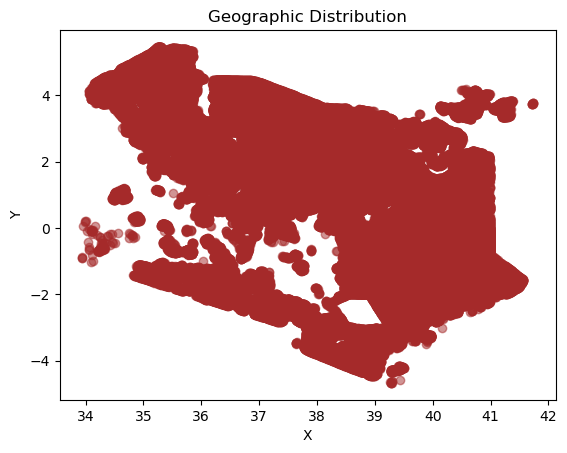

In [20]:
# Plots for Latitude and Longitude Data
import matplotlib.pyplot as plt

plt.scatter(pop_df['X'], pop_df['Y'], c='brown', alpha=0.5)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Geographic Distribution')
plt.show()


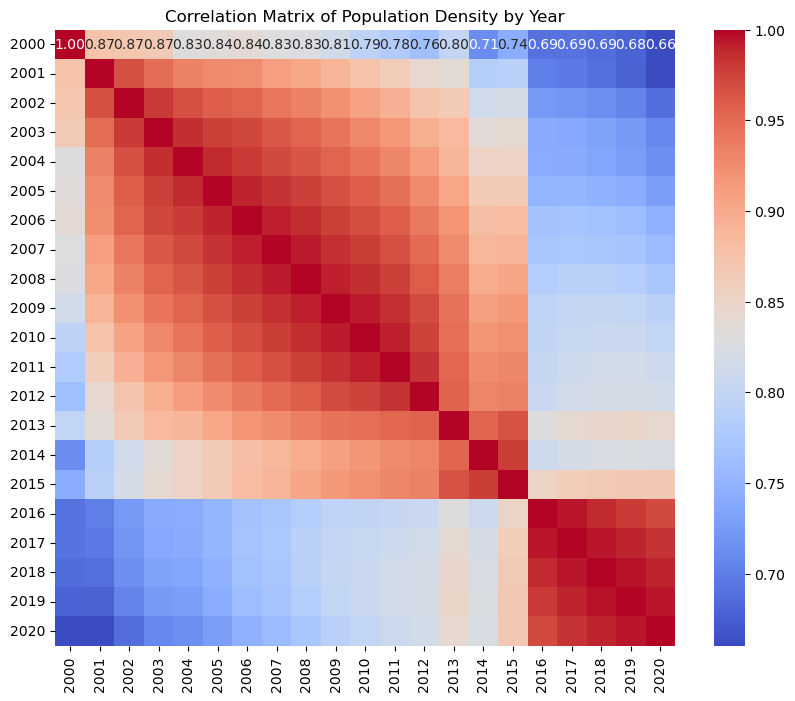

In [21]:
import seaborn as sns

# Select only the population density columns (skipping the first two columns)
density_data = pop_df.iloc[:, 2:]

# Calculate the correlation matrix
correlation_matrix = density_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Population Density by Year")
plt.show()

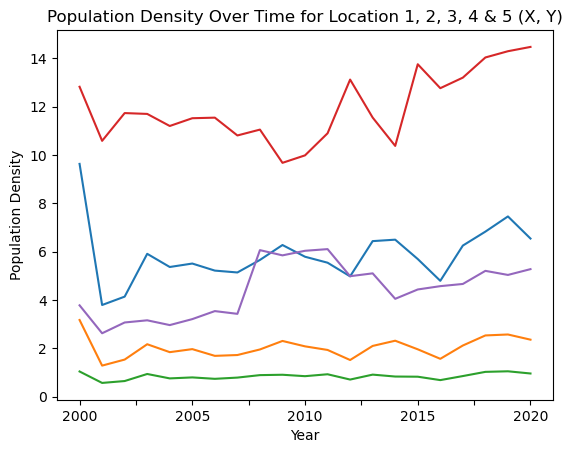

In [22]:
# Plot population density over time for the first 5 location
pop_df.set_index(['X', 'Y']).iloc[0].plot()
pop_df.set_index(['X', 'Y']).iloc[1].plot()
pop_df.set_index(['X', 'Y']).iloc[2].plot()
pop_df.set_index(['X', 'Y']).iloc[3].plot()
pop_df.set_index(['X', 'Y']).iloc[4].plot()

plt.title('Population Density Over Time for Location 1, 2, 3, 4 & 5 (X, Y)')
plt.xlabel('Year')
plt.ylabel('Population Density')
plt.show()

### Grid Infrastructure Data

In [23]:
# pip install rasterio

### Basic Information & Metadata

In [24]:
import pandas as pd
import rasterio
import numpy as np

In [25]:
with rasterio.open('../data/grid_infrustructure_data/global_data/global_1_1_1_1_1_0.tif') as src:
    # Read the band data
    data_df = src.read(
        1, out_shape=(int(src.height / 10), int(src.width / 10))
    )  # Downsample by a factor of 10
    transform = src.transform * src.transform.scale(
        (src.width / data_df.shape[1]), (src.height / data_df.shape[0])
    )

In [26]:
# Get indices for downsampled data
rows, cols = np.indices(data_df.shape)
xs, ys = rasterio.transform.xy(transform, rows, cols)

In [27]:
# Flatten and create DataFrame
df = pd.DataFrame({
    'x': np.array(xs).flatten(),
    'y': np.array(ys).flatten(),
    'value': data_df.flatten()
})

In [28]:
# pip install ace_tools

In [29]:
from IPython.display import display

# Display the DataFrame
display(df)

,x,y,value
0,-89.285679,51.854229,0
1,-89.185650,51.854229,0
2,-89.085622,51.854229,0
3,-88.985593,51.854229,0
4,-88.885564,51.854229,0
...,...,...,...
2125879,155.484179,-34.785725,0
2125880,155.584207,-34.785725,0
2125881,155.684236,-34.785725,0
2125882,155.784264,-34.785725,0


In [30]:
# Check for unique values in the data
unique_values = np.unique(data_df)
print("Unique pixel values in the dataset:", unique_values)

Unique pixel values in the dataset: [ 0  1  3  5  6  7 98]


In [31]:
unique, counts = np.unique(data_df, return_counts=True)
distribution = dict(zip(unique, counts))
print("Value distribution:", distribution)


Value distribution: {0: 2083473, 1: 20830, 3: 14080, 5: 4286, 6: 35, 7: 355, 98: 2825}


In [32]:
df = df[df['value'] != 0]  # Remove rows where 'value' is zero

In [33]:
df.head()

,x,y,value
14147,99.468192,51.353998,3
36222,100.168392,50.453583,1
41058,93.366450,50.253490,5
41186,106.170104,50.253490,98
41189,106.470190,50.253490,3


In [34]:
df.count

<bound method DataFrame.count of                   x          y  value
14147     99.468192  51.353998      3
36222    100.168392  50.453583      1
41058     93.366450  50.253490      5
41186    106.170104  50.253490     98
41189    106.470190  50.253490      3
...             ...        ...    ...
2114713   19.645410 -34.385541      5
2117165   19.645410 -34.485587      3
2119614   19.345325 -34.585633     98
2119615   19.445353 -34.585633     98
2122070   19.745439 -34.685679      3

[42411 rows x 3 columns]>

In [35]:
# Apply filters for Kenya's bounding box
kenya_data = df[(df['x'] >= 34.0) & (df['x'] <= 42.0) &
                (df['y'] >= -5.0) & (df['y'] <= 5.0)]

# Display the filtered data
kenya_data.head()

,x,y,value
1151247,36.650263,4.932591,3
1151249,36.850321,4.932591,1
1151250,36.950349,4.932591,1
1151253,37.250435,4.932591,5
1151255,37.450492,4.932591,1


In [36]:
# Export dataset to .csv
# kenya_data.to_csv('../data/grid_infrustructure_data/Kenya_data.csv')

EDA visualizations

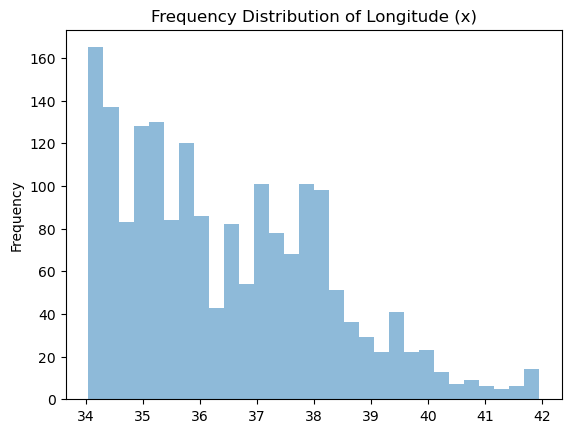

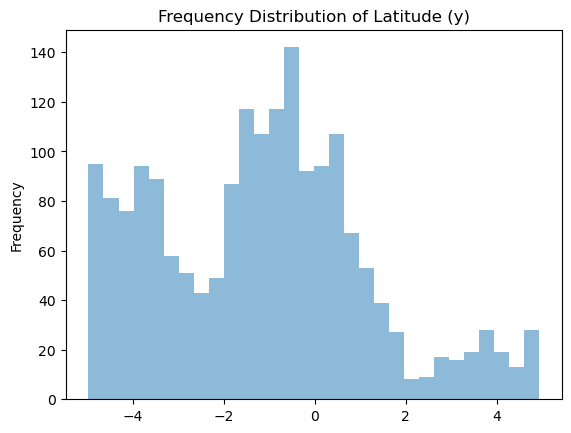

In [37]:
import matplotlib.pyplot as plt

# Histograms
kenya_data['x'].plot(kind='hist', bins=30, alpha=0.5, title='Frequency Distribution of Longitude (x)')
plt.show()

kenya_data['y'].plot(kind='hist', bins=30, alpha=0.5, title='Frequency Distribution of Latitude (y)')
plt.show()

This visualizations show thedistribution of grid infrastructure in the longitudes and latitudes

#### Heatmap

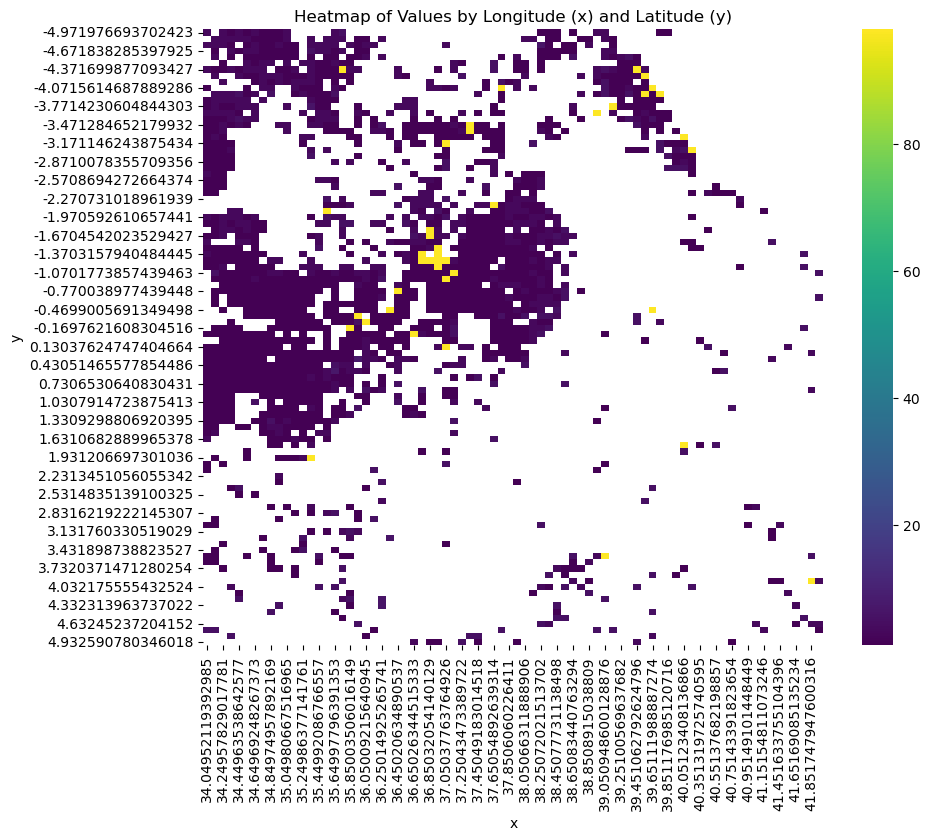

In [38]:
import seaborn as sns

# Creating a pivot table for heatmap
heatmap_data = kenya_data.pivot_table(values='value', index='y', columns='x', aggfunc='mean')
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='viridis')
plt.title('Heatmap of Values by Longitude (x) and Latitude (y)')
plt.show()

#### Hexbin

c:\Users\DAVE\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DAVE\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


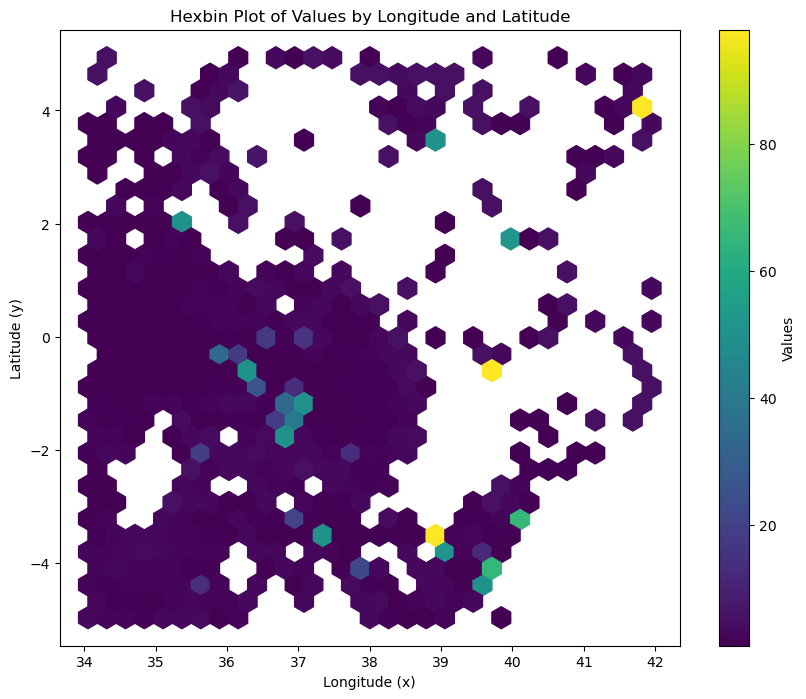

In [39]:
plt.figure(figsize=(10, 8))
plt.hexbin(kenya_data['x'], kenya_data['y'], C=kenya_data['value'], gridsize=30, cmap='viridis')
plt.colorbar(label='Values')
plt.xlabel('Longitude (x)')
plt.ylabel('Latitude (y)')
plt.title('Hexbin Plot of Values by Longitude and Latitude')
plt.show()

#### Correlation Matrix

In [40]:
# Correlation matrix
correlation_matrix = kenya_data[['x', 'y', 'value']].corr()
print(correlation_matrix)

              x         y     value
x      1.000000 -0.037123  0.118003
y     -0.037123  1.000000 -0.026224
value  0.118003 -0.026224  1.000000


### Electricity Generation and Demand

#### Electricity Demand

In [41]:
elecricity_demand = pd.read_csv('../data/electricity_generation_data/electricity-demand.csv')
elecricity_demand.head()

,Entity,Code,Year,Electricity demand - TWh
0,ASEAN (Ember),NaN,2000,378.61
1,ASEAN (Ember),NaN,2001,404.85
2,ASEAN (Ember),NaN,2002,433.19
3,ASEAN (Ember),NaN,2003,458.24
4,ASEAN (Ember),NaN,2004,496.56


In [42]:
elecricity_demand.columns

Index(['Entity', 'Code', 'Year', 'Electricity demand - TWh'], dtype='object')

In [43]:
# extract data for Kenya
electricity_dem_kenya = elecricity_demand[elecricity_demand['Code'] == 'KEN']
electricity_dem_kenya.head()

,Entity,Code,Year,Electricity demand - TWh
2784,Kenya,KEN,2000,4.51
2785,Kenya,KEN,2001,4.98
2786,Kenya,KEN,2002,5.37
2787,Kenya,KEN,2003,5.67
2788,Kenya,KEN,2004,6.32


In [44]:
# Check for missing values
print(electricity_dem_kenya.isnull().sum())

Entity                      0
Code                        0
Year                        0
Electricity demand - TWh    0
dtype: int64


In [45]:
# Rename columns for convenience
electricity_dem_kenya = electricity_dem_kenya.rename(columns={'Electricity demand - TWh': 'Electricity_Demand_TWh'})

In [46]:
electricity_dem_kenya.columns

Index(['Entity', 'Code', 'Year', 'Electricity_Demand_TWh'], dtype='object')

In [47]:
electricity_dem_kenya.dtypes

Entity                     object
Code                       object
Year                        int64
Electricity_Demand_TWh    float64
dtype: object

### Distribution of Electricity Demand

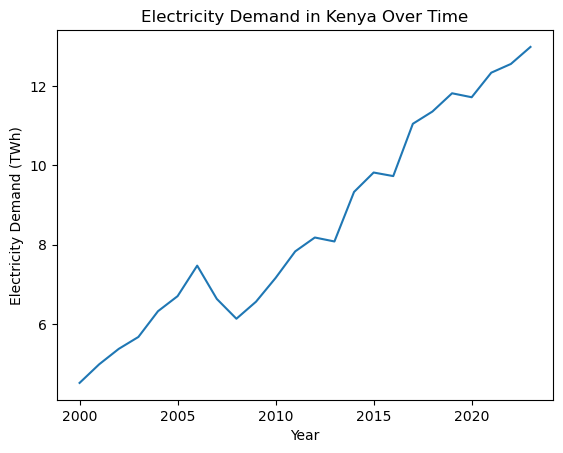

In [48]:
# Plot Electricity Demand over Years
plt.plot(electricity_dem_kenya['Year'], electricity_dem_kenya['Electricity_Demand_TWh'])
plt.xlabel('Year')
plt.ylabel('Electricity Demand (TWh)')
plt.title('Electricity Demand in Kenya Over Time')
plt.show()

#### Electricity Generation

In [49]:
electricity_generation = pd.read_csv('../data/electricity_generation_data/electricity-generation.csv')
electricity_generation.head()

,Entity,Code,Year,Electricity generation - TWh
0,ASEAN (Ember),NaN,2000,378.61
1,ASEAN (Ember),NaN,2001,404.85
2,ASEAN (Ember),NaN,2002,433.19
3,ASEAN (Ember),NaN,2003,458.24
4,ASEAN (Ember),NaN,2004,496.56


In [50]:
# extract data for Kenya
electricity_gen_kenya = electricity_generation[electricity_generation['Code'] == 'KEN']
electricity_gen_kenya.head()

,Entity,Code,Year,Electricity generation - TWh
3501,Kenya,KEN,2000,4.31
3502,Kenya,KEN,2001,4.81
3503,Kenya,KEN,2002,5.15
3504,Kenya,KEN,2003,5.48
3505,Kenya,KEN,2004,6.16


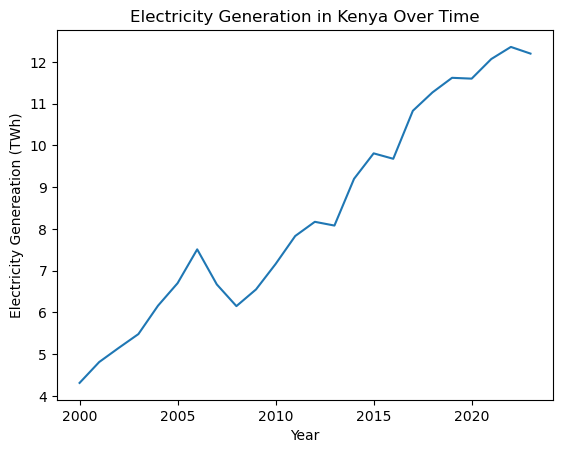

In [51]:
# Plot Electricity Demand over Years
plt.plot(electricity_gen_kenya['Year'], electricity_gen_kenya['Electricity generation - TWh'])
plt.xlabel('Year')
plt.ylabel('Electricity Genereation (TWh)')
plt.title('Electricity Generation in Kenya Over Time')
plt.show()

In [ ]:
# import numpy as np

# # Example function to calculate Haversine distance between two geographic points
# def haversine(lat1, lon1, lat2, lon2):
#     R = 6371  # Earth radius in kilometers
#     phi1, phi2 = np.radians(lat1), np.radians(lat2)
#     dphi = np.radians(lat2 - lat1)
#     dlambda = np.radians(lon2 - lon1)
    
#     a = np.sin(dphi / 2) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(dlambda / 2) ** 2
#     return 2 * R * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

# # Define the distance threshold in kilometers
# threshold_distance = 1  # Set as desired

# # Initialize a list to store matches
# matches = []

# # Loop through each pair of points in df_power and df_gen
# for i, row_power in df_power.iterrows():
#     for j, row_gen in df_gen.iterrows():
#         distance = haversine(row_power['latitude'], row_power['longitude'], row_gen['latitude'], row_gen['longitude'])
#         if distance <= threshold_distance:
#             matches.append((i, j, distance))

# # Convert matches to a DataFrame for easier analysis
# matches_df = pd.DataFrame(matches, columns=['df_power_index', 'df_gen_index', 'distance'])

# # Display matched pairs based on proximity
# import ace_tools as tools; tools.display_dataframe_to_user(name="Matched Pairs Between df_power and df_gen", dataframe=matches_df)

NameError: name 'df_power' is not defined

### Identify the best way to merge data

In [55]:
# Identify if coordinates match
longitudes_match = kenya_data['x'].equals(pop_df['X'])

latitudes_match = kenya_data['y'].equals(pop_df['Y'])

print("Longitudes match:", longitudes_match)
print("Latitudes match:", latitudes_match)

Longitudes match: False
Latitudes match: False
